# Project: NFL Team Attendance Variety and Influencing Factors
# Part2: Analysis

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Adjustments to the DataFrame
- add stadium_capacity to show the stadium capacity for each team.<br>
  Mainly import the data from [stadium comparison](https://www.stadiumsofprofootball.com/comparisons/). For those that moved to different stadiums, used google to fill in the missing values.
- add new columns to show the average home attendance and average home attendance rate.
- convert the 'renovated' values to 0 and 1. Value equals 1 means the stadium is renovated that year, 0 means that the stadium is not renovated that year.

In [3]:
# import the clean_data from part1
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()
# import the stadium_comparison_clean from part1
stadiums = pd.read_csv('stadium_comparison_clean.csv')

# create a temporary DataFrame with only the columns needed
stadiums_capacities = stadiums[['team_name', 'capacity', 'year_opened']]

# merge the two dataframes to add the stadium capacity to the clean_data
merged = pd.merge(clean_data, stadiums_capacities, on='team_name', how='left')
merged.head()

# rename the columns
merged = merged.rename(columns={'capacity': 'stadium_capacity', 'year_opened': 'stadium_open_year'})

# set the capacity to None if the stadium_open_year is after the year of the game
merged['stadium_capacity'] = merged.apply(lambda x: x['stadium_capacity'] if x['stadium_open_year'] <= x['year'] else None, axis=1)

In [4]:
# show each team's None values in the stadium_capacity column
No_capacity = merged[merged['stadium_capacity'].isnull()][['team_name', 'year', 'stadium_open_year', 'stadium_capacity']]
# export the DataFrame to a csv file
No_capacity.to_csv('No_capacity.csv', index=False)

# fill in the None values with the previous capacity of the stadiums manually
# save the DataFrame with previous capacity
previous_capacity = pd.read_csv('previous_capacity.csv')
# drop the stadium_open_year column
previous_capacity = previous_capacity.drop(columns=['stadium_open_year'])
# convert the stadium_capacity column to integer
previous_capacity['stadium_capacity'] = previous_capacity['stadium_capacity'].str.replace(',', '').astype(int)

In [5]:
# merge the two dataframes
final_dataset = pd.merge(merged, previous_capacity, on=['team_name', 'year'], how='left')
# fill the missing values in the stadium_capacity column with the values from the previous_capacity column
final_dataset['stadium_capacity_x'] = final_dataset['stadium_capacity_x'].fillna(final_dataset['stadium_capacity_y'])

# drop the unnecessary columns and rename the columns
final_dataset = final_dataset.drop(columns=['stadium_capacity_y','stadium_open_year', 'stadium_open_year', 'stadium_renovation_year'])
final_dataset = final_dataset.rename(columns={'stadium_capacity_x': 'stadium_capacity'})
final_dataset = final_dataset.rename(columns={'total': 'total_attendance'})

# convert the renovated column to 0 and 1
final_dataset['renovated'] = final_dataset['renovated'].apply(lambda x: 1 if x == True else 0)

# calculate the average home attendance and the average home attendance rate
final_dataset['home_attendance_per_game'] = final_dataset['home_attendance']/8
final_dataset['home_attendance_rate_per_game'] = final_dataset['home_attendance_per_game']/final_dataset['stadium_capacity']

# drop the total_attendance column and away_attendance column
final_dataset = final_dataset.drop(columns=['total_attendance', 'away_attendance'])

In [6]:
final_dataset.head()

,team,team_name,year,home_attendance,wins,loss,playoffs,superbowl_winner,win_percentage,state,county,gdp_chained_million$,renovated,stadium_capacity,home_attendance_per_game,home_attendance_rate_per_game
0,Arizona,Cardinals,2001,307315,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0,0,73379.0,38414.375,0.523506
1,Arizona,Cardinals,2002,327272,5,11,No Playoffs,0,0.31,Arizona,Maricopa,150559.0,0,73379.0,40909.000,0.557503
2,Arizona,Cardinals,2003,288499,4,12,No Playoffs,0,0.25,Arizona,Maricopa,160947.0,0,73379.0,36062.375,0.491454
3,Arizona,Cardinals,2004,300267,6,10,No Playoffs,0,0.38,Arizona,Maricopa,169495.0,0,71706.0,37533.375,0.523434
4,Arizona,Cardinals,2005,401035,5,11,No Playoffs,0,0.31,Arizona,Maricopa,184185.0,0,71706.0,50129.375,0.699096


In the NFL, attendance is determined not by ticket sales but by **turnstile count**—the number of people who show up to watch the game; thus, it may include people besides the audience, such as team staff and players. Therefore, the attendance rate may be higher than 1.

## Here are the real world questions we will try to answer:
<ol>
<li>To what degree does the Gross Domestic Product (GDP) of a county correlate with the attendance figures of its local sports team?</li>
<li>How significantly does the performance of a sports team, as reflected by their win-loss record, affect their game attendance numbers?
<li>Does the renovation of the stadium increase the home attendance significantly?

## Descriptive Statistics

Provide a comprehensive summary of your combined dataset using descriptive statistics. This should include means, medians, modes, ranges, variance, and standard deviations for the relevant features of your data.  The descriptive statistics should inform your guiding questions that you developed in Part I of the project, rather than merely providing an overview of your data.  Interpret these results to draw preliminary conclusions about the data.


### Steps
- calculate the overall means, medians, modes, ranges, variance, and standard deviations of home_attendance, home_attendance_rate_per_game, win_percentage and gdp_chained_million$ of all teams.
- calculate each team's means, medians, modes, ranges, variance, and standard deviations of home_attendance, home_attendance_rate_per_game, win_percentage and gdp_chained_million$ each year.
- find the teams that have renovated the stadium from 2001 to 2018. (renovated == 1)

## Inferential Statistics

Conduct appropriate hypothesis tests to investigate if there are significant differences or correlations within your data.  This might involve regression analysis, ANOVA, and/or chi-squared tests.

Clearly state your null and alternative hypotheses, choose an appropriate significance level, and discuss your findings. Make sure to justify the choice of your tests.


### Steps
- use single regression analysis between winning_percentage and home_attendance_rate_per_game, gdp_chained_million$ and home_attendance_rate per game. (Tianyi)
- use multiple regression analysis between winning_percentage, gdp_chained_million$ and home_attendance_rate_per_game. (Jinren)
- use Anova to determine whether there is a significant influence of winning_percentage and gdp_chained_million$ on home_attendance_rate_per_game.(Tianyi)
- use chi-square test to determine whether there is a significant difference in the home_attendance_rate_per_game between the renovated year and the year before. (Jiayu)
- use chi-square test to determine whether there is a significant increase in the home_attendance_rate_per_game if the team wins the Super bowl. (Jiayu)

In [7]:
# Categorize the home_attendance_per_game into low, medium, and high
final_dataset["home_attendance_categories"] = pd.qcut(final_dataset["home_attendance_per_game"], q=3, labels=["low", "medium", "high"])

# use chi-square test to see if there is a significant relationship between home_attendance_categories and renovated
contingency_table = pd.crosstab(final_dataset['home_attendance_categories'], final_dataset['renovated'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of Freedom: {dof}')

Chi-square Statistic: 0.13262353751601058
P-value: 0.9358390534258475
Degrees of Freedom: 2


Chi-square (χ²) value: 0.1326. The chi-square suggests that there is a little variation between the observed and expected frequencies.
P-value: 0.9358. This is well above the common significance level of 0.05, indicating that the observed association could very likely be due to random chance.

In conclusion, there is **no evidence** to suggest a significant association between stadium renovation and home attendance categories in the context of your data.


In [8]:
# Apply chi-square test to see if there is a significant relationship between home_attendance_categories and superbowl_winner
contingency_table = pd.crosstab(final_dataset['home_attendance_categories'], final_dataset['superbowl_winner'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of Freedom: {dof}')

Chi-square Statistic: 2.434419357599596
P-value: 0.2960551043026103
Degrees of Freedom: 2


The chi-square statistic of 2.4344 with 2 degrees of freedom is not statistically significant, as indicated by the p-value of 0.296. This p-value is higher than the conventional threshold of 0.05, which suggests that there is **no evidence** of an association between the categories of home attendance and winning the Super Bowl in your dataset. In other words, based on this test, we cannot conclude that the distribution of home attendance categories differs for teams that won the Super Bowl compared to those that did not.

## Graphical Analysis

Create various types of plots to visualize relationships within your data. Use histograms, bar charts, scatter plots, box plots, and any other suitable graphical representations you've learned.

Be sure to use appropriate titles, labels, and legends to make your plots readable and informative.

Interpret the graphical representations to uncover patterns, trends, and outliers.


### Steps
- draw regression plots between between winning_percentage and home_attendance_rate_per_game, gdp_chained_million$ and home_attendance_rate per game.
- draw box plots for the home_attendance_rate_per_gamer in two groups, the renovated year and the year before.

## Comparative Analysis

Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation.  Note that for some projects, the nature of this comparative analysis will be obvious.  For others, you will need to think about how you might subset your data.

Discuss any notable similarities or differences you have identified.


In [9]:
final_dataset.head()

,team,team_name,year,home_attendance,wins,loss,playoffs,superbowl_winner,win_percentage,state,county,gdp_chained_million$,renovated,stadium_capacity,home_attendance_per_game,home_attendance_rate_per_game,home_attendance_categories
0,Arizona,Cardinals,2001,307315,7,9,No Playoffs,0,0.44,Arizona,Maricopa,145484.0,0,73379.0,38414.375,0.523506,low
1,Arizona,Cardinals,2002,327272,5,11,No Playoffs,0,0.31,Arizona,Maricopa,150559.0,0,73379.0,40909.000,0.557503,low
2,Arizona,Cardinals,2003,288499,4,12,No Playoffs,0,0.25,Arizona,Maricopa,160947.0,0,73379.0,36062.375,0.491454,low
3,Arizona,Cardinals,2004,300267,6,10,No Playoffs,0,0.38,Arizona,Maricopa,169495.0,0,71706.0,37533.375,0.523434,low
4,Arizona,Cardinals,2005,401035,5,11,No Playoffs,0,0.31,Arizona,Maricopa,184185.0,0,71706.0,50129.375,0.699096,low


### Steps
- group by team, analyze each team's attendance, winning_percentage and gdp over years (line plot?). And find out whether there is similar trend.
- group by year, look at the distribution of team's attendance, winning_percentage and gdp each year.
- group by team (Vikings, Chief, Patriots), analyze each team's attendance, winning_percentage, and GDP over years

In [21]:
# Analyze the team's attendance, win_percentage and GDP over year from Vikings, Chiefs, and Patriots (Group by certain teams)
team = final_dataset[(final_dataset['team_name'] == 'Vikings') | (final_dataset['team_name'] == 'Chiefs') | (final_dataset['team_name'] == 'Patriots')]
average_home_attendance_rate = team.groupby(['team_name', 'year'])['home_attendance_rate_per_game'].mean().reset_index()
average_winning_percentage = team.groupby(['team_name', 'year'])['win_percentage'].mean().reset_index()
average_gdp = team.groupby(['team_name', 'year'])['gdp_chained_million$'].mean().reset_index()


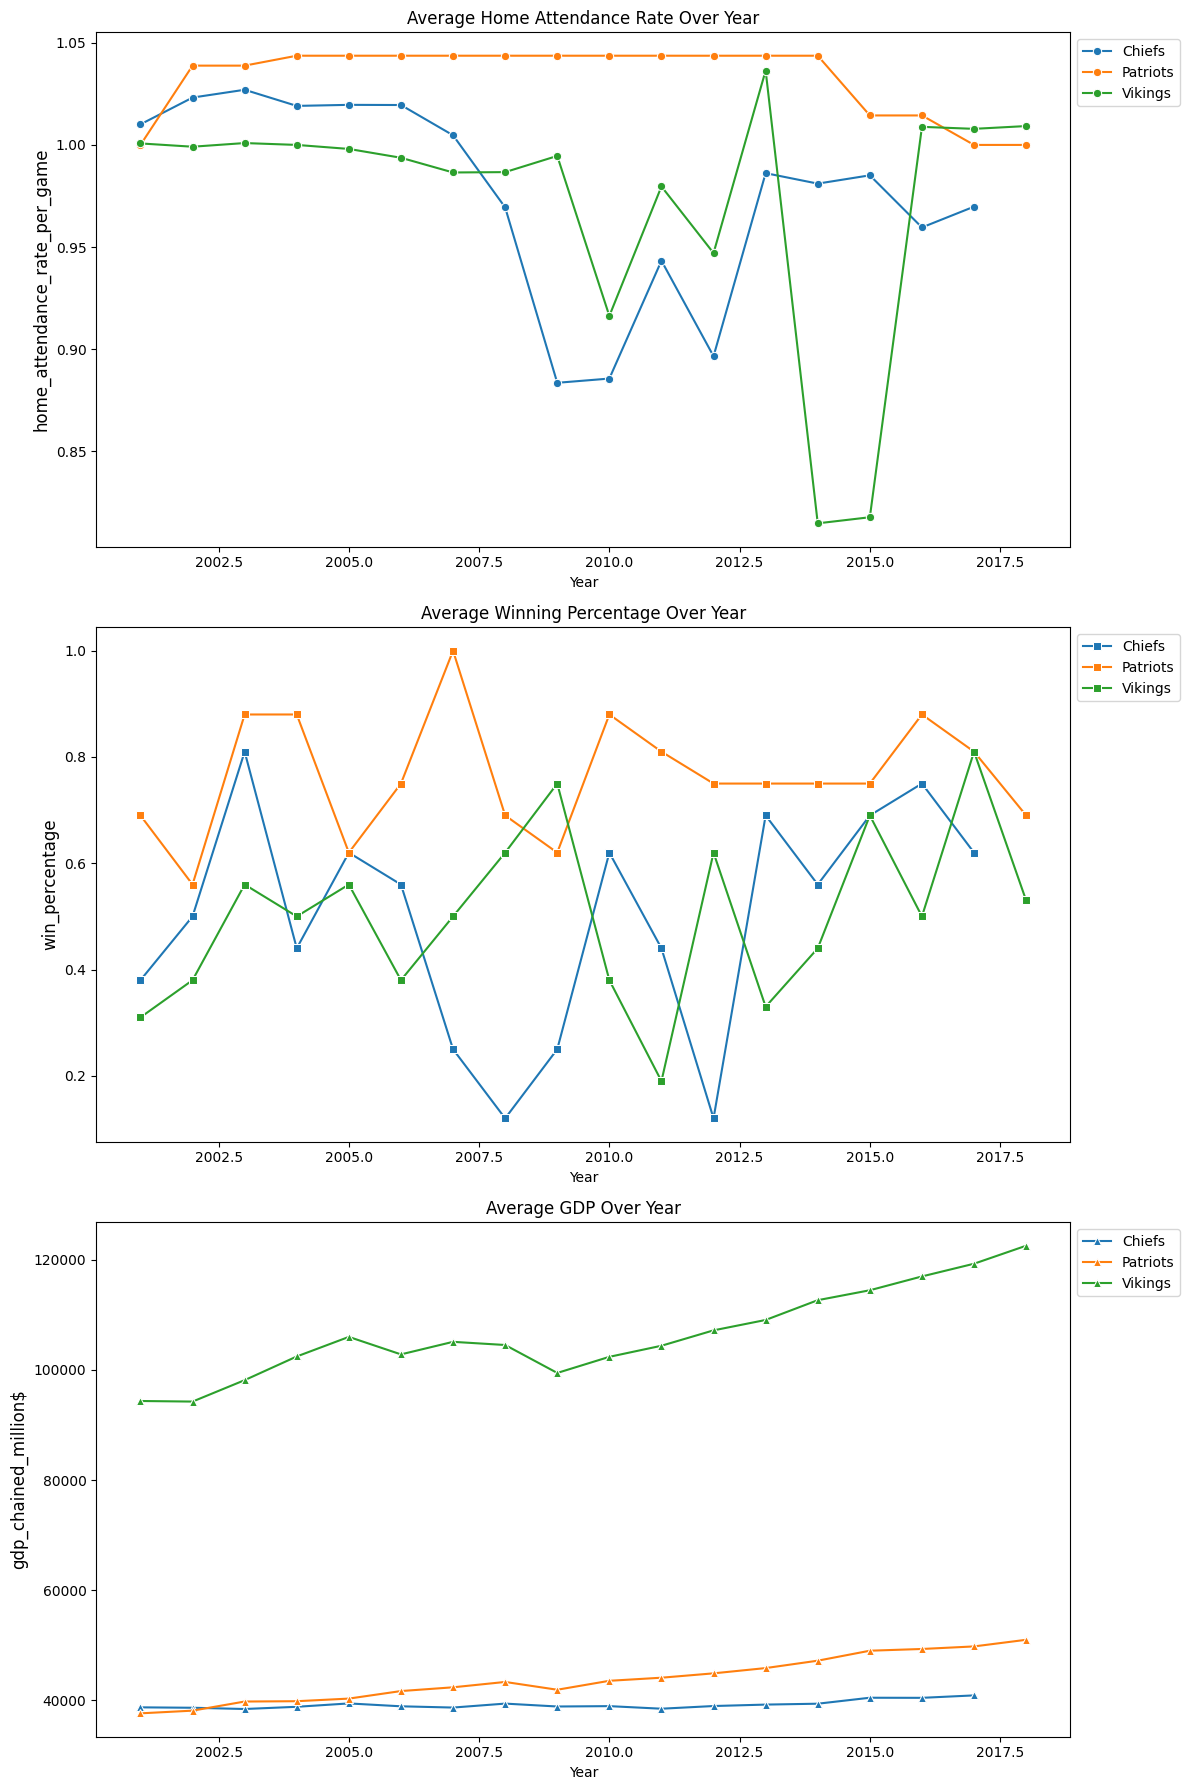

In [22]:
# Graph for average home attendance rate, winning percentage, and gdp over year for Vikings, Chiefs, and Patriots
def plot_graphs(data):
    fig, ax = plt.subplots(3, 1, figsize=(12, 18))  # Increase figure size

    # Home Attendance Rate
    sns.lineplot(data=data['average_home_attendance_rate'], x='year', y='home_attendance_rate_per_game', hue='team_name', ax=ax[0], marker='o')
    ax[0].set_title('Average Home Attendance Rate Over Year')
    ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of plot

    # Winning Percentage
    sns.lineplot(data=data['average_winning_percentage'], x='year', y='win_percentage', hue='team_name', ax=ax[1], marker='s')
    ax[1].set_title('Average Winning Percentage Over Year')
    ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

    # GDP
    sns.lineplot(data=data['average_gdp'], x='year', y='gdp_chained_million$', hue='team_name', ax=ax[2], marker='^')
    ax[2].set_title('Average GDP Over Year')
    ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

    for axis in ax:
        axis.set_xlabel('Year')  # Set x-axis label
        axis.set_ylabel(axis.get_ylabel(), fontsize=12)  # Set y-axis label with larger font
        axis.tick_params(axis='both', which='major', labelsize=10)  # Set larger tick labels

    plt.tight_layout()
    plt.show()

# Now call the function with your data
plot_graphs({
    'average_home_attendance_rate': average_home_attendance_rate,
    'average_winning_percentage': average_winning_percentage,
    'average_gdp': average_gdp
})


**Summary of comparative analysis for Vikings, Chiefs, and Patriots**

**Home attendance rate**

The Vikings have had some fluctuations in their home attendance rate, with a notable decline starting around 2010, hitting a significant low in 2015. This suggests a decrease in fan turnout for home games during that period, which could be due to a variety of factors, such as team performance, economic conditions, or other external events.

The Patriots have maintained a relatively stable and high home attendance rate throughout the years. There are minor fluctuations but no significant dips or peaks, indicating consistent fan engagement at their home games.

The Chief' home attendance rate shows minor fluctuations but generally remains at a high level. The rate is fairly stable, which could reflect sustained success on the field or strong fan loyalty.

**Winning percentage**

The Patriots display a high and relatively stable winning percentage with occasional dips. They have multiple points where their winning percentage reaches 0.8 or above, suggesting periods of dominance in their performance. The relatively consistent high performance could correlate with sustained periods of success and possibly championships.

The Chiefs' winning percentage shows a pattern of significant fluctuation over the years. Notably, there are several peaks where the winning percentage rises sharply, indicating seasons of high success. These peaks are followed by sharp declines, suggesting a potential rebuilding phase or significant changes within the team that may have impacted performance.

The Vikings exhibit a highly variable winning percentage with multiple ups and downs. They have years with strong performance, as indicated by peaks in their winning percentage, but these are interspersed with years of significantly lower success. The sharp valley in their performance around 2011 is particularly noticeable and might correspond to a season of poor results.

**GDP**

The GDP trend for the Chief is relatively flat with slight upward movement, indicating stable economic conditions in the region, although the graph does not reflect any direct correlation to the team's performance.

The Patriots and Vikings show a steady increase in GDP over the years, which could be reflective of the overall economic growth in their respective regions.

**Overall conclusion**

The comparative analysis of the Minnesota Vikings, Kansas City Chiefs, and New England Patriots reveals varied patterns of fan engagement and on-field success. The Patriots exhibit both a consistent home attendance rate and winning percentage, suggesting a strong, well-supported team with a loyal fan base. The Chiefs, despite fluctuations in winning percentage, show steady fan attendance, indicating enduring support through varying levels of team performance. The Vikings display the greatest fluctuations in both attendance and performance, with a sharp decline in fan attendance in 2015, underscoring potential issues with fan retention during periods of poor performance. While winning percentages and attendance rates are closely linked for these teams, the regional GDP trends suggest that local economic factors may also play a significant role, independent of the teams' success.


In [23]:
# Analyze stadium capacity, home attendance categories, and win percentage for the 49ers, Rams, and Chargers
team = final_dataset[(final_dataset['team_name'] == '49ers') | (final_dataset['team_name'] == 'Rams') | (final_dataset['team_name'] == 'Chargers')]
average_stadium_capacity = team.groupby(['team_name', 'year'])['stadium_capacity'].mean().reset_index()
average_home_attendance_categories = team.groupby(['team_name', 'year'])['home_attendance_categories'].value_counts(normalize=True).unstack().reset_index()
average_winning_percentage = team.groupby(['team_name', 'year'])['win_percentage'].mean().reset_index()

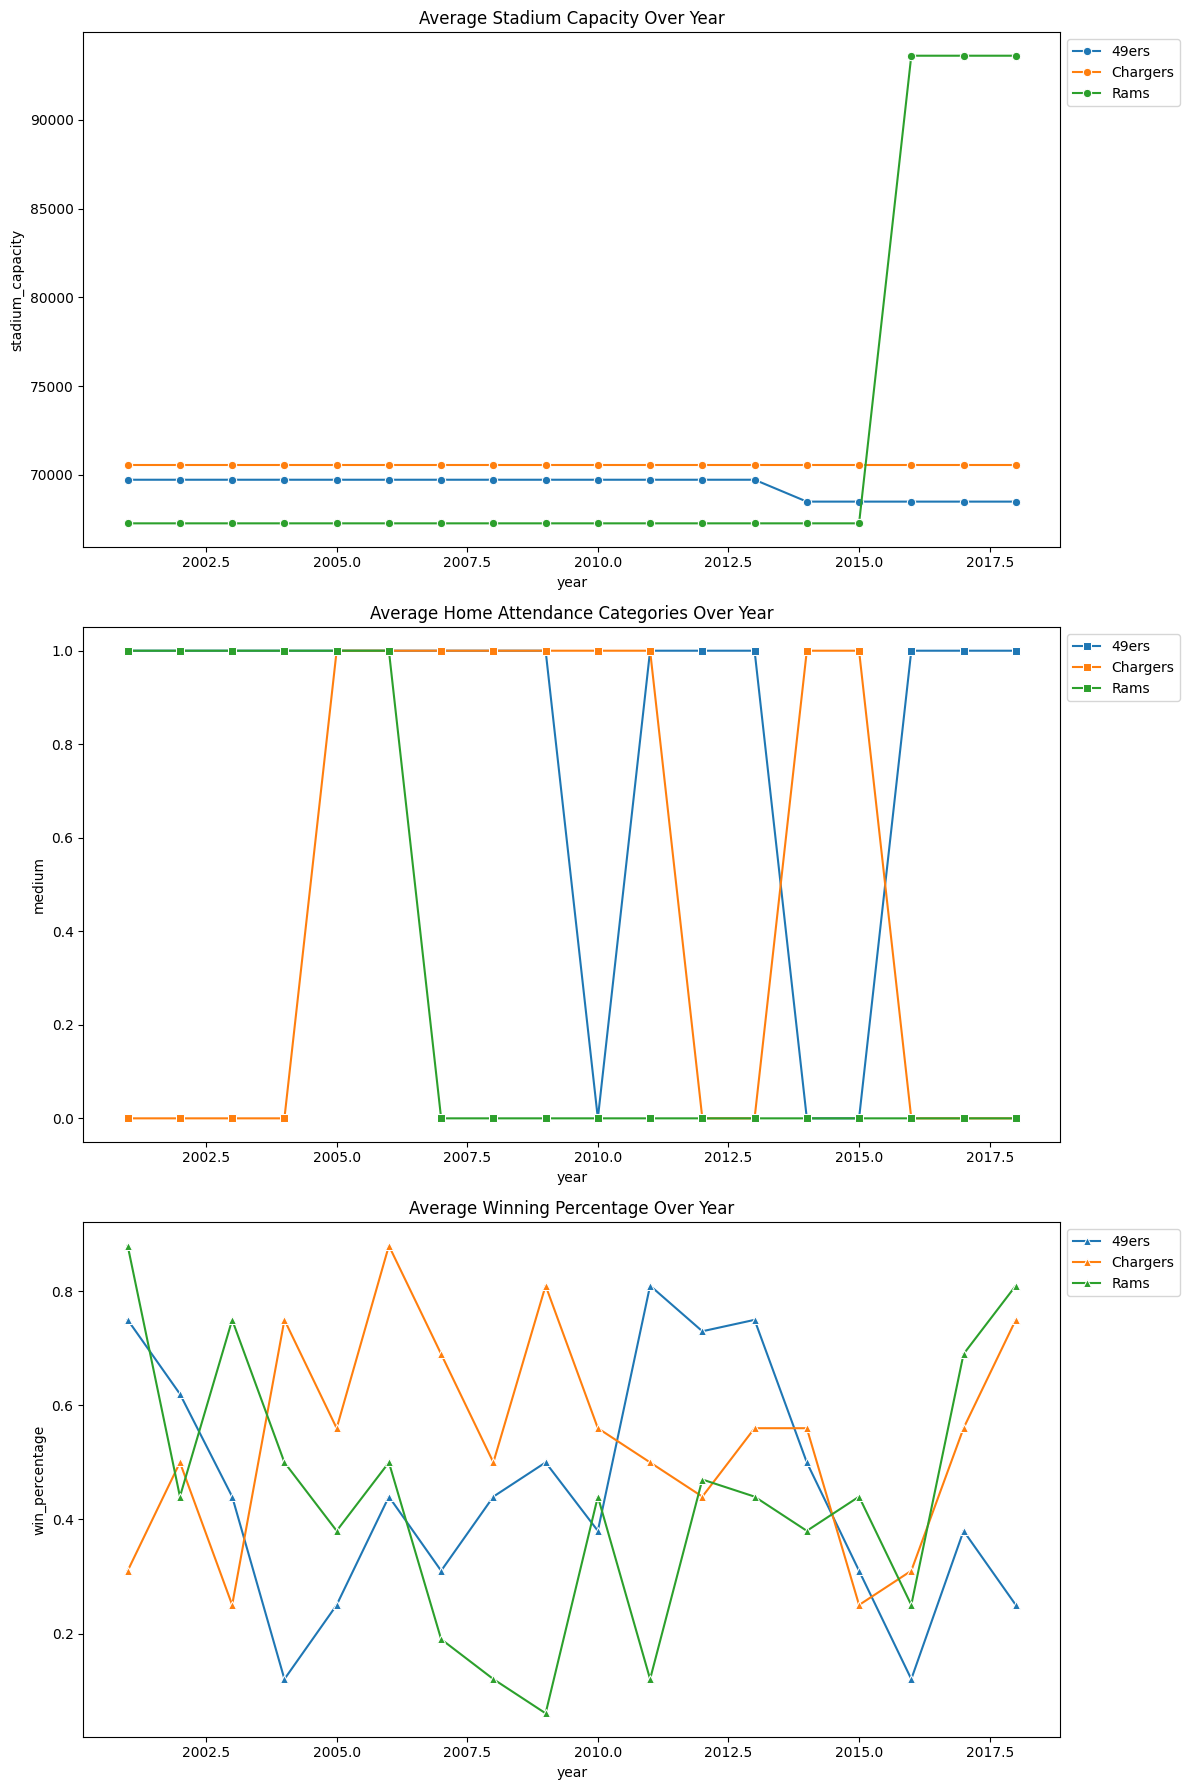

In [25]:
# Improved plotting function
def plot_graphs(data):
    fig, ax = plt.subplots(3, 1, figsize=(12, 18))  # Increase figure size

    # Stadium Capacity
    sns.lineplot(data=data['average_stadium_capacity'], x='year', y='stadium_capacity', hue='team_name', ax=ax[0], marker='o')
    ax[0].set_title('Average Stadium Capacity Over Year')
    ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of plot

    # Home Attendance Categories - Using a secondary axis if scales are very different
    sns.lineplot(data=data['average_home_attendance_categories'], x='year', y='medium', hue='team_name', ax=ax[1], marker='s')
    ax[1].set_title('Average Home Attendance Categories Over Year')
    ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1)) #bbox_to_anchor is used to move the legend outside the plot

    # Win Percentage
    sns.lineplot(data=data['average_winning_percentage'], x='year', y='win_percentage', hue='team_name', ax=ax[2], marker='^')
    ax[2].set_title('Average Winning Percentage Over Year')
    ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1)) #bbox_to_anchor is used to move the legend outside the plot

    plt.tight_layout()
    plt.show()

# Now call the function with your data
plot_graphs({
    'average_stadium_capacity': average_stadium_capacity,
    'average_home_attendance_categories': average_home_attendance_categories,
    'average_winning_percentage': average_winning_percentage
})

In [14]:
# Compare the average home attendance rate per game between the teams that won the superbowl and the teams that did not
final_dataset['won_superbowl'] = final_dataset['superbowl_winner'].apply(lambda x: 1 if x == True else 0)

average_home_attendance_rate = final_dataset.groupby('won_superbowl')['home_attendance_rate_per_game'].mean()
average_home_attendance_rate

won_superbowl
0    0.959402
1    0.986802
Name: home_attendance_rate_per_game, dtype: float64

In [15]:
# Stats test for the home_attendance_rate_per_game between the teams that won the superbowl and the teams that did not
t_stat, p_value = stats.ttest_ind(final_dataset[final_dataset['won_superbowl'] == 1]['home_attendance_rate_per_game'], final_dataset[final_dataset['won_superbowl'] == 0]['home_attendance_rate_per_game'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 1.3500165293743924
P-value: 0.17756198399439294


Teams that did not win the Super Bowl have an average home attendance rate per game of 0.95402 (or 95.402%).
Teams that won the Super Bowl have an average home attendance rate per game of 0.96802 (or 96.802%).
The average home attendance rate per game is slightly higher for teams that won the Super Bowl compared to teams that did not win. Specifically, there is a difference of about 1.4 percentage points in the home attendance rates between the two groups. However, based on the statistical test results shared earlier, with a p-value of 0.178, which is greater than the conventional significance threshold of 0.05, we cannot conclude that there is a statistically significant difference in home attendance rates per game between teams that won the Super Bowl and those that did not.

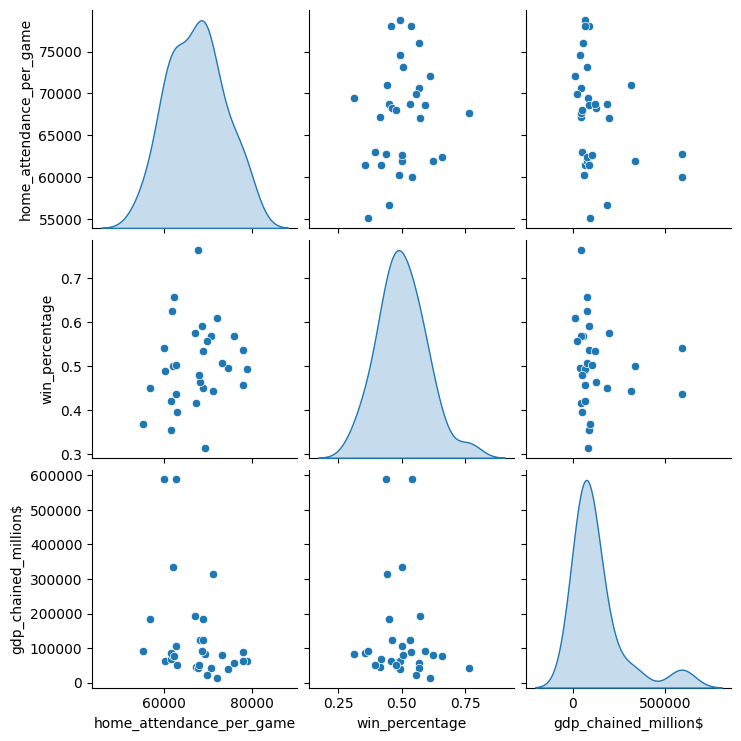

In [16]:
# groupby the team, analyzing team_attendance,winning percentage, and GDP over year
team_attendance = final_dataset.groupby('team_name').agg({
    'home_attendance_per_game': 'mean',
    'win_percentage': 'mean',
    'gdp_chained_million$': 'mean'
}).reset_index()

sns.pairplot(team_attendance, vars=['home_attendance_per_game', 'win_percentage', 'gdp_chained_million$'], diag_kind='kde')
plt.show()

 The diagonal plots indicate the distribution of each variable individually, showing a spread of data points without a single, dominant peak. The off-diagonal scatter plots, meant to reveal any correlations between pairs of variables, do not display any discernible patterns or clear correlations. This suggests that, within the dataset's context, team game attendance, winning rates, and GDP do not have a straightforward or linear relationship with one another.

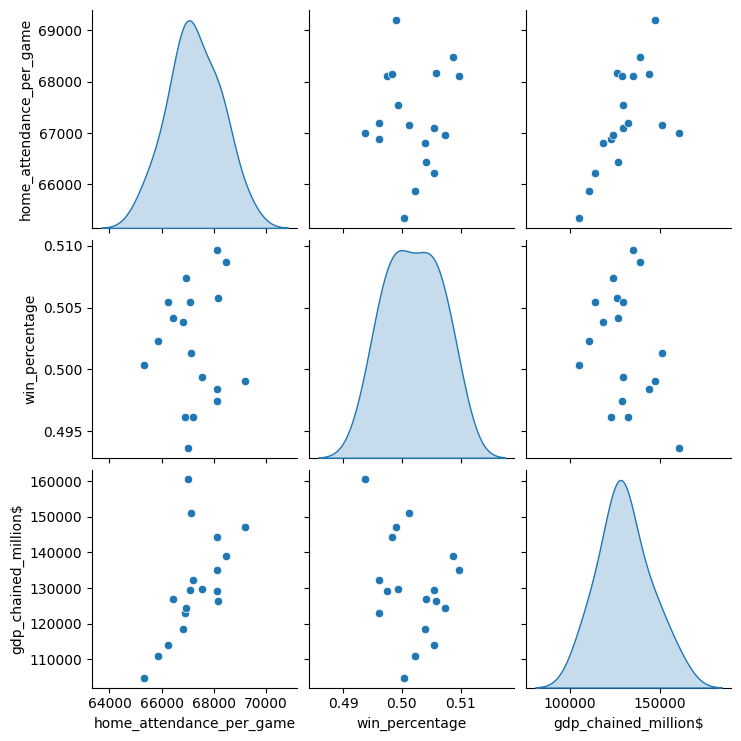

In [17]:
# group by year, look at the distribution of team's attendance, winning_percentage and gdp each year.
year = final_dataset.groupby('year').agg({
    'home_attendance_per_game': 'mean',
    'win_percentage': 'mean',
    'gdp_chained_million$': 'mean'
}).reset_index()

sns.pairplot(year, vars=['home_attendance_per_game', 'win_percentage', 'gdp_chained_million$'], diag_kind='kde')
plt.show()

There's a concentration of data around specific ranges for 'home_attendance_per_game' and 'gdp_chained_millions', suggesting common values or ranges for these metrics across the dataset. However, 'win_percentage' appears to be fairly uniform. No obvious linear correlations are seen in the scatter plots, indicating that these variables do not strongly predict one another in a linear sense within this dataset.

## Multivariate Analysis

Perform multivariate analysis to understand the relationships among three or more variables in your dataset.

Use techniques like cross-tabulation, pivot tables, and multivariate graphs.


### Steps
- variables to analyze: home_attendance_rate_per_game, winning_percentage, gdp_chained_million$, renovated
- analysis: multiple regression, pivot tables, multivariate graphs.

## Synthesis

Synthesize the findings from your descriptive and inferential statistics along with your graphical analyses to answer your research questions.

Discuss how the combination of the datasets has provided added value in terms of insights or capabilities that would not be possible with the individual datasets in isolation.


## Documentation

Outline the steps you took in your analysis, providing the rationale for the choice of tools and techniques.

Clearly document your code, analyses, and interpretations so that they are understandable and reproducible.


## Reporting & Interpretation

Prepare markdown blocks that summarize your methodology, analysis, and findings.  You should intersperse these with your code.

Your notebook should be well-structured, with clear sections, headings, and subheadings.


## Reflection

Include a section (using one or more markdown blocks) at the end of your notebook in which you reflect on the process of analyzing the data. Discuss any challenges you encountered and how you overcame them.

Critically evaluate the limitations of your analysis and suggest areas for further research or improvement.
